<a href="https://colab.research.google.com/github/ShanmukhiKairuppala/Diabetic_Retinopathy_Detection/blob/main/DR_APTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API_Credentials/kaggle.json  ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [04:29<00:00, 44.5MB/s]
100% 9.51G/9.51G [04:29<00:00, 37.9MB/s]


In [9]:
!unzip aptos2019-blindness-detection.zip -d Dataset/

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/test_images/512beaada8f0.png  
  inflating: Dataset/test_images/51323e9d2070.png  
  inflating: Dataset/test_images/515675001b9e.png  
  inflating: Dataset/test_images/515877da2def.png  
  inflating: Dataset/test_images/5168ddccea88.png  
  inflating: Dataset/test_images/5172c056a687.png  
  inflating: Dataset/test_images/5177461f5339.png  
  inflating: Dataset/test_images/51910bcb980d.png  
  inflating: Dataset/test_images/51a3e9b6a1c0.png  
  inflating: Dataset/test_images/51bbd82feec8.png  
  inflating: Dataset/test_images/51de5fb8eccd.png  
  inflating: Dataset/test_images/51e88694c81f.png  
  inflating: Dataset/test_images/51f0bf8f1544.png  
  inflating: Dataset/test_images/51f57fb32840.png  
  inflating: Dataset/test_images/51fa42dc1415.png  
  inflating: Dataset/test_images/5276ab33b7b0.png  
  inflating: Dataset/test_images/52a353760f72.png  
  inflating: Dataset/test_images/531937254e73.png  
  inflating: 

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


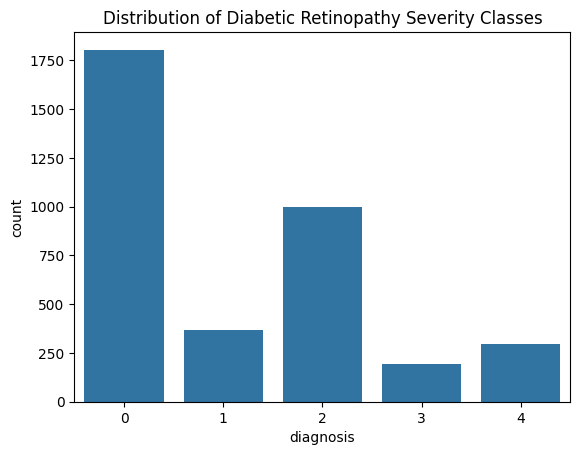

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv')

# Display the first few rows of the training labels
print(train_labels.head())

# Plot the distribution of classes
sns.countplot(x='diagnosis', data=train_labels)
plt.title('Distribution of Diabetic Retinopathy Severity Classes')
plt.show()


In [13]:
'''
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv')

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, target_size)  # Resize
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess all images and store in a list
processed_images = []

for image_id in train_labels['id_code']:
    image_path = os.path.join(image_folder, f'{image_id}.png')
    processed_image = preprocess_image(image_path)
    processed_images.append(processed_image)

# Convert the list to a NumPy array
X = np.array(processed_images)

# Assign labels
y = train_labels['diagnosis'].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
'''

KeyboardInterrupt: 

In [14]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load a smaller sample of the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv').sample(frac=0.1, random_state=42)

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, target_size)  # Resize
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess all images in parallel and store in a list
from joblib import Parallel, delayed

processed_images = Parallel(n_jobs=-1)(delayed(preprocess_image)(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'])

# Convert the list to a NumPy array
X = np.array(processed_images)

# Assign labels
y = train_labels['diagnosis'].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")


X_train shape: (292, 64, 64, 3), y_train shape: (292,)
X_valid shape: (74, 64, 64, 3), y_valid shape: (74,)


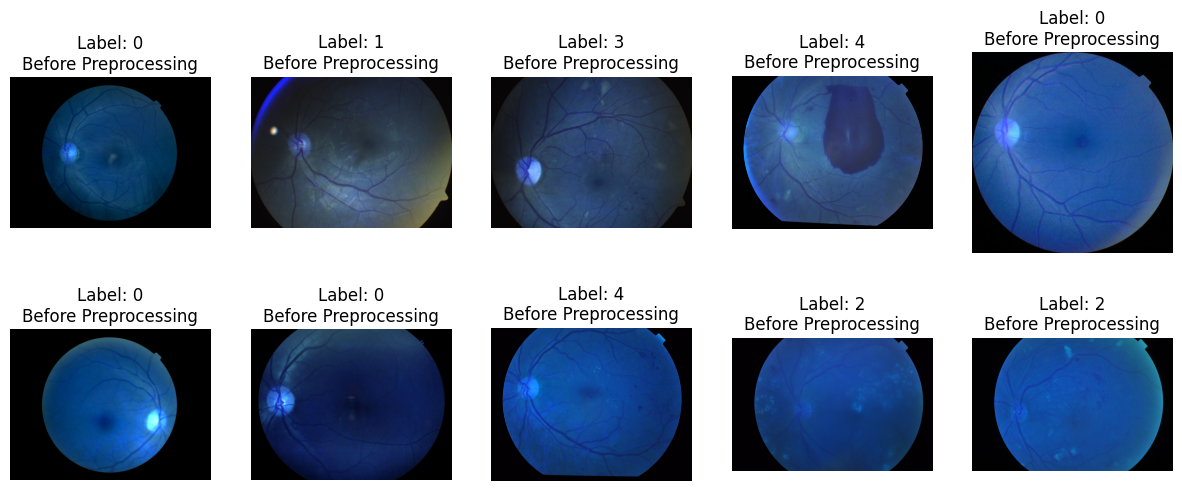

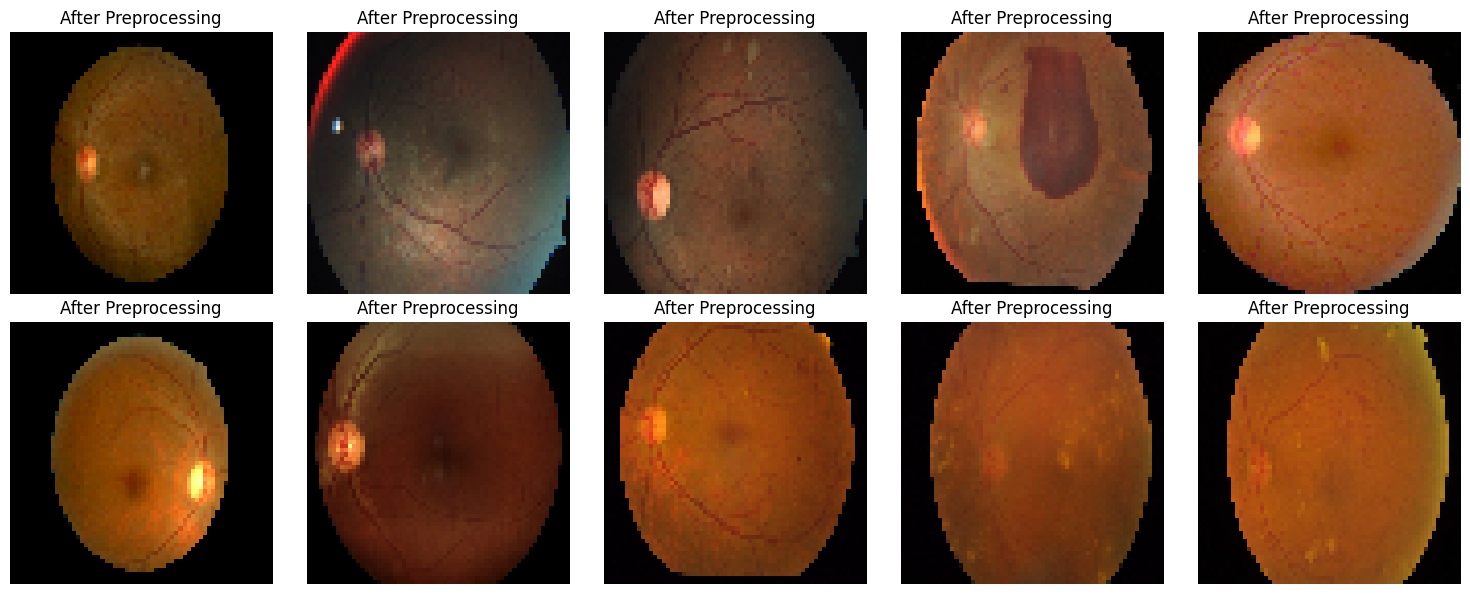

In [18]:
# Function to display images before and after preprocessing
def display_images_before_after(images, processed_images, labels, rows=2, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(images[i])
        axs[i].set_title(f"Label: {labels.iloc[i]}\nBefore Preprocessing")
        axs[i].axis('off')

    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(processed_images[i])
        axs[i].set_title(f"After Preprocessing")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display a set of 10 images before and after preprocessing
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Ensure that the dataset has at least 10 samples
if len(train_labels) >= 10:
    sample_images = [cv2.imread(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_processed_images = [preprocess_image(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_labels = train_labels['diagnosis'].iloc[sample_indices]

    display_images_before_after(sample_images, sample_processed_images, sample_labels)
else:
    print("Dataset has fewer than 10 samples. Please adjust the sample_indices.")


In [19]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed

# Load a smaller sample of the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv').sample(frac=0.1, random_state=42)

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(64, 64)):
    # Read and resize the original image
    original_image = cv2.imread(image_path)
    resized_image = cv2.resize(original_image, target_size)

    # Normalize pixel values
    normalized_image = resized_image / 255.0

    # Convert normalized image back to np.uint8
    normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(normalized_image_uint8, (5, 5), 0)

    # Canny edge detection
    edges = cv2.Canny(blurred_image, 30, 50)

    return edges

# Preprocess all images in parallel and store in a list
processed_images = Parallel(n_jobs=-1)(delayed(preprocess_image)(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'])

# Convert the list to a NumPy array
X = np.array(processed_images)

# Assign labels
y = train_labels['diagnosis'].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")


X_train shape: (292, 64, 64), y_train shape: (292,)
X_valid shape: (74, 64, 64), y_valid shape: (74,)


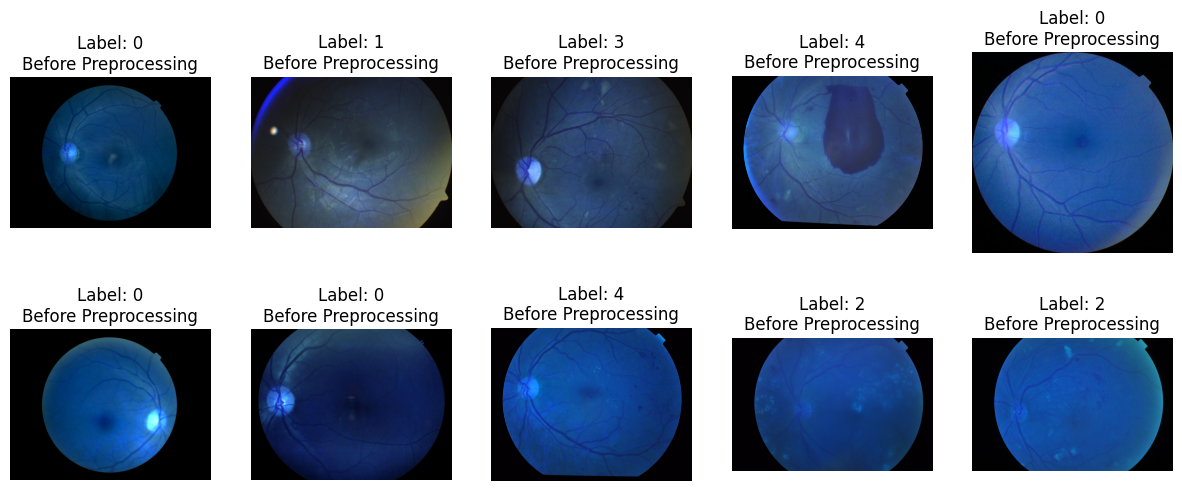

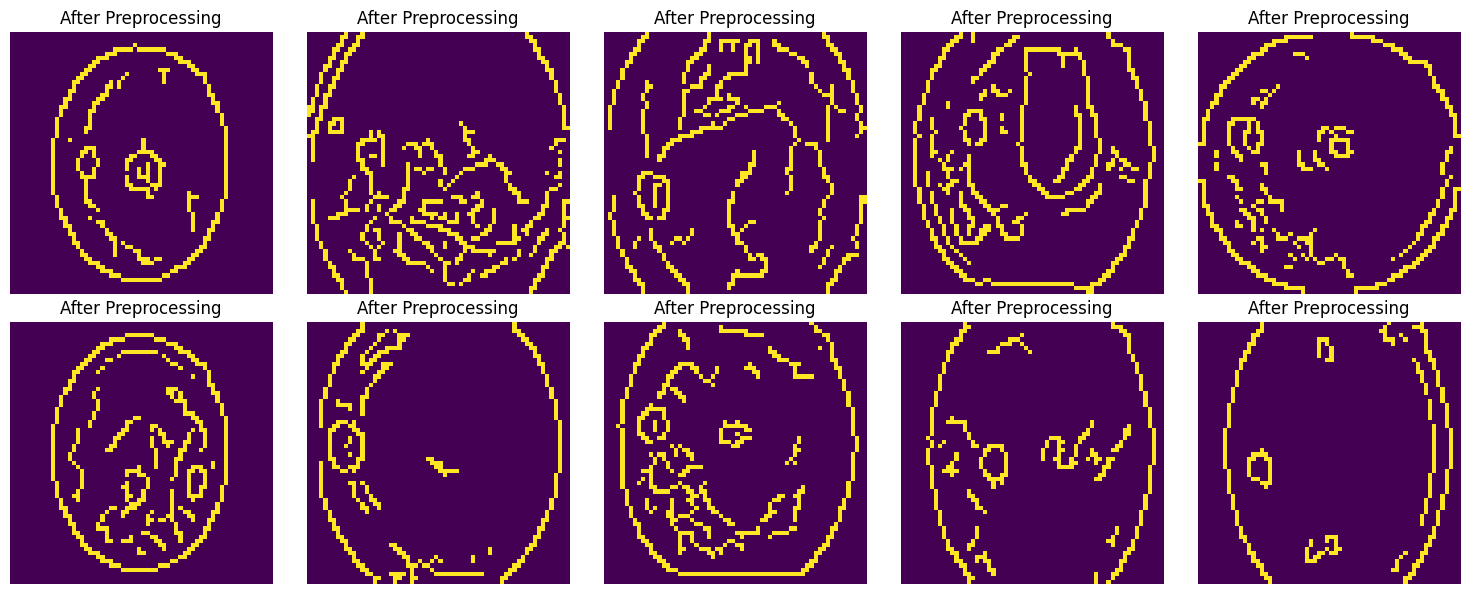

In [20]:
# Function to display images before and after preprocessing
def display_images_before_after(images, processed_images, labels, rows=2, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(images[i])
        axs[i].set_title(f"Label: {labels.iloc[i]}\nBefore Preprocessing")
        axs[i].axis('off')

    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(processed_images[i])
        axs[i].set_title(f"After Preprocessing")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display a set of 10 images before and after preprocessing
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Ensure that the dataset has at least 10 samples
if len(train_labels) >= 10:
    sample_images = [cv2.imread(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_processed_images = [preprocess_image(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_labels = train_labels['diagnosis'].iloc[sample_indices]

    display_images_before_after(sample_images, sample_processed_images, sample_labels)
else:
    print("Dataset has fewer than 10 samples. Please adjust the sample_indices.")
